In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('social.csv')
df.sample(5)

,Age,EstimatedSalary,Purchased
85,31,118000,1
234,38,112000,0
107,27,89000,0
8,25,33000,0
87,28,85000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visualizing the dataset

[]

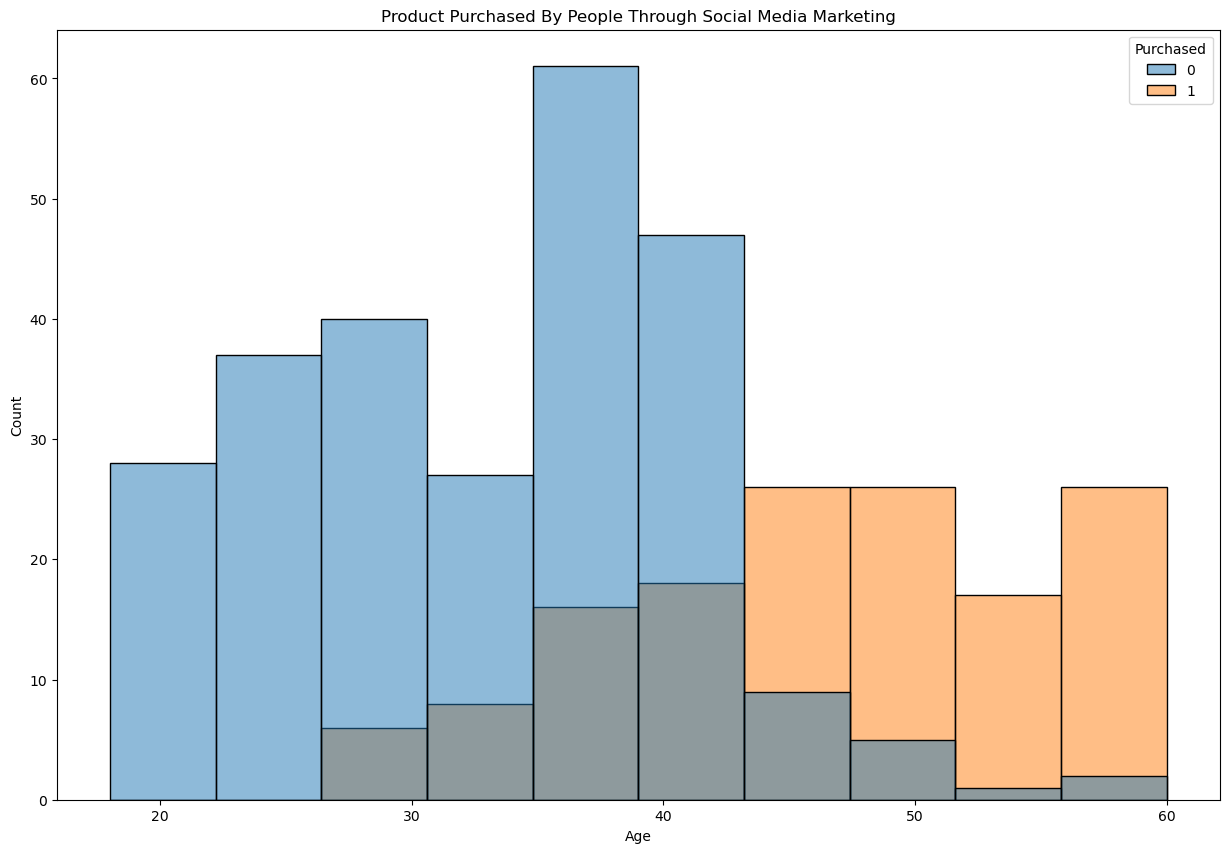

In [8]:
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x=df['Age'], hue=df['Purchased'], data=df)
plt.plot()

The visualization above shows that people over 45 among the target audience are more interested in purchasing the product.

[]

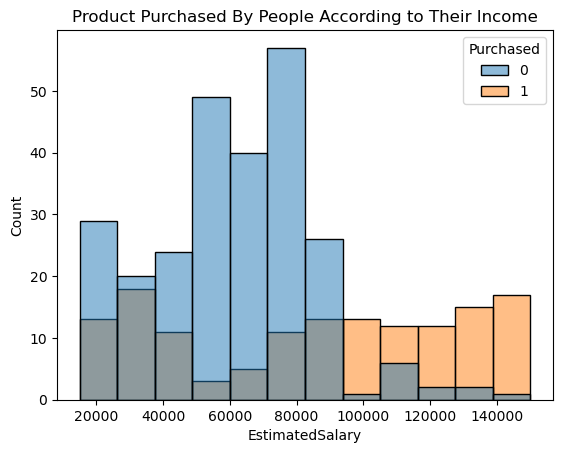

In [9]:
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x=df['EstimatedSalary'], hue=df['Purchased'], data=df)
plt.plot()

The visualization above shows that people with a monthly income of over 90,000 among the target audience are more interested in purchasing the product.

# Training a Social Media Ads Classification Model

In [10]:
X = df.drop('Purchased', axis='columns')
y = df['Purchased']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
model.score(X_test, y_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.83

In [20]:
y_pred = model.predict(X_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
cm = confusion_matrix(y_test, y_pred)

[]

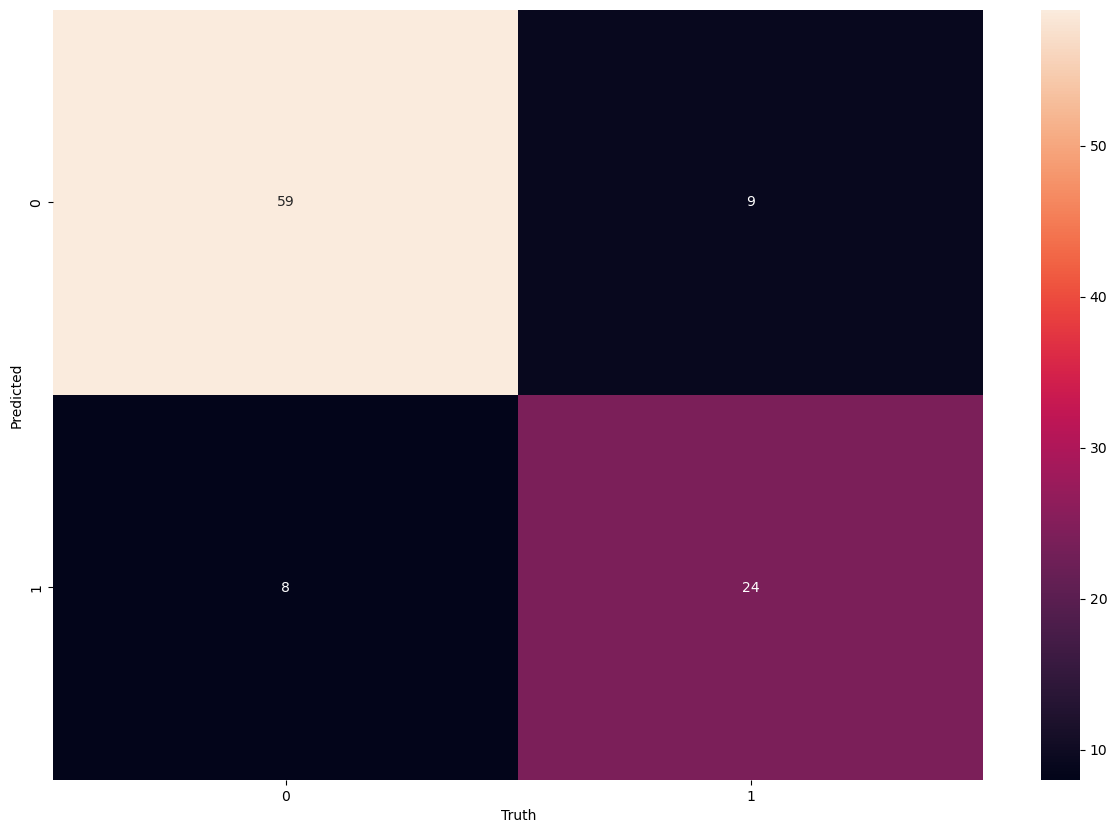

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()